# Homework 5 - Exploring StackOverflow!

## 1. Data

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('sx-stackoverflow-a2q.txt', nrows=2, header=None)
df2 = pd.read_csv('sx-stackoverflow-c2q.txt', nrows=2, header=None)
df3 = pd.read_csv('sx-stackoverflow-c2a.txt', nrows=2, header=None)

In [3]:
def expand_column(df, type1=None, type2=None):
    df = pd.concat([df[[0]], df[0].str.split(' ', expand=True)], axis=1)
    df.columns = ['N', 'u1', 'u2', 't']
    df = df.drop('N', axis=1)
    df.loc[:, 'u1'] = type1 + df.loc[:, 'u1']
    df.loc[:, 'u2'] = type2 + df.loc[:, 'u2']
    return df

In [4]:
def draw_graph(G, edges_label):
    cmap = []
    for node in G:
        if node.startswith('u'):
            cmap.append('purple')
        elif node.startswith('q'):
            cmap.append('yellow')
        elif node.startswith('a'):
            cmap.append('green')
    # cmap = ['purple' if node.startswith('u') we 'yellow' for node in G]
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color=cmap)
    edge_labels = dict([((n1, n2), edges_label)
                        for n1, n2, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

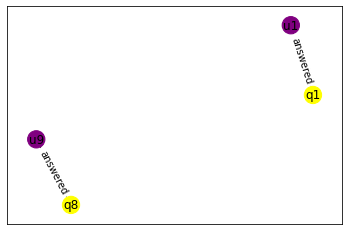

In [5]:
df1 = expand_column(df1, type1='u', type2='q')
G1 = nx.from_pandas_edgelist(df1, 'u1', 'u2', create_using=nx.DiGraph())
draw_graph(G1, edges_label='answered')

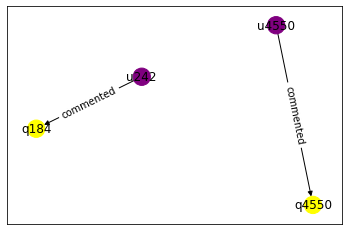

In [6]:
df2 = expand_column(df2, type1='u', type2='q')
G2 = nx.from_pandas_edgelist(df2, 'u1', 'u2', create_using=nx.DiGraph())
draw_graph(G2, 'commented')

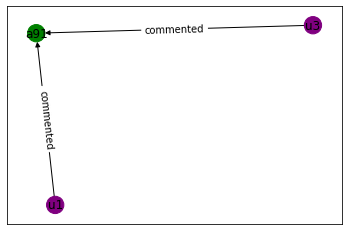

In [7]:
df3 = expand_column(df3, type1='u', type2='a')
G3 = nx.from_pandas_edgelist(df3, 'u1', 'u2', create_using=nx.DiGraph())
draw_graph(G3, 'commented')